SNAKES AND LADDERS REINFORCEMENT LEARNING

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.patches as patches

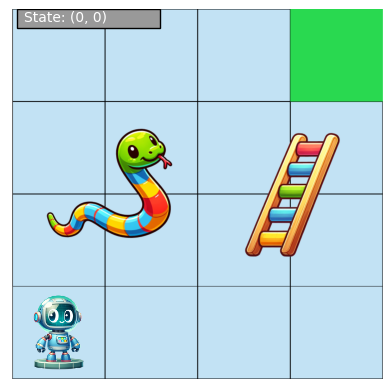

In [6]:
def render_game_board(board_position):
    
    board_image = mpimg.imread('Snakes_and_ladder.png')
    robot_icon = mpimg.imread('robot.png')

    fig, ax = plt.subplots()
    ax.imshow(board_image)

    # grid size and cell size calculations 
    grid_size = (4,4)
    cell_size_x = board_image.shape[1] / grid_size[1]
    cell_size_y = board_image.shape[0] / grid_size[0]

    # calculate robot icon position considering bottom left as origin

    robot_x = board_position[0] * cell_size_x + cell_size_x / 2
    robot_y = (grid_size[1] - board_position[1] - 1) * cell_size_y + cell_size_y / 2

    #Load and overlay the the robot icon

    zoom_factor = 0.4 # zooming to adjust into the size of the cell
    robot_imagebox = OffsetImage(robot_icon, zoom = zoom_factor)
    robot_ab = AnnotationBbox(robot_imagebox, (robot_x, robot_y), frameon = False)
    ax.add_artist(robot_ab)

    # add a caption indicating the current state, action and reward

    caption_x = 10
    caption_y = 0
    rect = patches.Rectangle((caption_x, caption_y), 310, 40, facecolor = '#999999',edgecolor="#000000")
    ax.add_patch(rect)
    plt.text(caption_x + 15, caption_y + 25, f"State: {board_position}", fontsize=10, color="white")

    plt.axis('off')  # Turn off axis
    plt.show()

# Render the board with the robot at position (0,0)
render_game_board((0, 0))

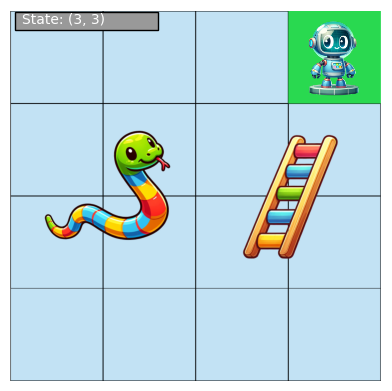

In [7]:
render_game_board((3,3))

Define robot and enxt state

In [8]:
def get_next_position_reward(board_position,action):
  # Define the grid size and special positions
  grid_size = (4,4) #4x4 grib
  ladder_bottom = (2,1)
  ladder_top = (3,2)
  snake_head = (1,2)
  snake_tail = (0,1)


  # Set of possible actions
  action_space = {
      0:(-1,0), # Move left
      1:(1,0), # Move right
      2:(0,1), # Move up
      3:(0,-1), # Move down
  }

  # calculate the new position
  new_position = (board_position[0]+action_space[action][0],
                  board_position[1]+action_space[action][1])

  # ensure the new_position is within the board boundry
  new_position = (max(0, min(new_position[0], grid_size[0] - 1)),
                max(0, min(new_position[1], grid_size[1] - 1)))


  # Check for the special positions near the ladder and the snakes
  if new_position == ladder_bottom:
    new_position = ladder_top
    reward = 2 # Positive reward for finding the ladder
  elif new_position == snake_head:
    new_position = snake_tail
    reward = -2 # Negative reward for hitting the snake
  elif new_position == (grid_size[0]-1, grid_size[1]-1):
    reward = 5
  else:
    reward = -1 # standard step cost

  return new_position, reward

In [9]:
next_position, reward = get_next_position_reward((1, 0), 1)  # Example: Moving right from (0,0)
print(f"Next Position: {next_position}, Reward: {reward}")

Next Position: (2, 0), Reward: -1


In [12]:
import random
from IPython import display
import time

pos = (0,0)
total_reward = 0
for i in range(30):

  # render the board first
  render_game_board(pos)
  time.sleep(0.5)

  if pos == (3,3):
    break

  # action is randomly picked
  action = random.randint(0,3)

  # get next position and reward
  next_position, reward = get_next_position_reward(pos,action)

  display.clear_output(wait=True)

  # Update the position and the reward
  pos = next_position
  total_reward += reward


print(f"Total reward is:  {total_reward}")

Total reward is:  -2


In [13]:
# Initialize an empty Q-table
Q={}

# Initialize the starting state
pos= (0,0)

# Initialize the Q-value for the starting state at 0
Q[(pos,0)] = 0 # state= (0,0) action= 0:"move left"
Q[(pos,1)] = 0 # state= (0,0) action= 1: "move right"
Q[(pos,2)] = 0 # state= (0,0) action= 2: "move up"
Q[(pos,3)] = 0 # state= (0,0) action= 1: "move down"

In [14]:
def choose_best_action(Q, state):
    """
    Choose the action with the highest Q-value for a given state.
    If multiple actions have the same highest Q-value, one of them is chosen randomly.

    Args:
    Q (dict): Q-table where keys are (state, action) pairs, and values are Q-values.
    state (tuple): The current state (grid position).

    Returns:
    int: The action with the highest Q-value.
    """
    # Filter the Q-table to only include entries for the given state
    filtered_Q = {action: Q_value for (s, action), Q_value in Q.items() if s == state}

    # Find the maximum Q-value among these actions
    if filtered_Q != {}:
      max_Q_value = max(filtered_Q.values())
      # Get all actions that have the maximum Q-value
      best_actions = [action for action, Q_value in filtered_Q.items() if Q_value == max_Q_value]
    else:
      best_actions = [0,1,2,3]
    # Choose one of the best actions randomly
    return random.choice(best_actions)

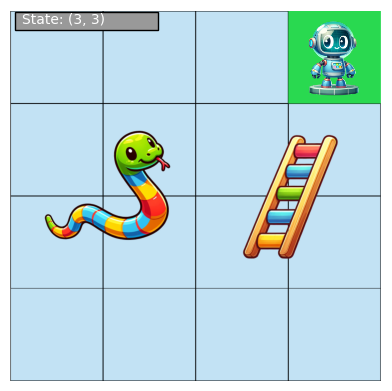

Total reward: 5


In [15]:
# Loop over 30 game runs
# Each game ends when the agent reaches the green cell

max_num_games = 30
episodes = 0
total_reward = 0

while episodes< max_num_games:
  print(f"Current episode: {episodes}")
  time.sleep(0.5)

  # Render the current grid state
  display.clear_output(wait=True)
  render_game_board(pos)

  # If we reach the green cell reinitialize
  if pos == (3,3):
    print(f"Total reward: {total_reward}")
    time.sleep(2)
    episodes += 1
    pos = (0,0)
    total_reward = 0

  # Select an action
  action=choose_best_action(Q,pos)

  # Observe the next position and the reward
  next_pos, reward = get_next_position_reward(pos,action)

  # Add new position to the Q-table if not already
  if (next_pos, 0) not in Q:
    Q[(next_pos,0)] = 0
    Q[(next_pos,1)] = 0
    Q[(next_pos,2)] = 0
    Q[(next_pos,3)] = 0

  # Finally, update the Q-table for the current position
  Qmax = max(Q[(next_pos, 0)],
             Q[(next_pos, 1)],
             Q[(next_pos, 2)],
             Q[(next_pos, 3)])
  # add the reward
  Q[(pos, action)] = reward + Qmax

  # total reward
  total_reward += reward

  # Update to the next position
  pos = next_pos


In [16]:
def print_optimal_trajectory(Q, pos, path=None):
    if path is None:
        path = [pos]

    if pos == (3, 3):
        print("End")
        return path
    else:
        action = choose_best_action(Q, pos)
        next_pos, _ = get_next_position_reward(pos, action)
        print(str(pos) + "->" + str(next_pos))
        path.append(next_pos)
        return print_optimal_trajectory(Q, next_pos, path)

# Example usage
path = print_optimal_trajectory(Q, (0, 0))
print("Optimal Path:", path)

(0, 0)->(0, 1)
(0, 1)->(1, 1)
(1, 1)->(3, 2)
(3, 2)->(3, 3)
End
Optimal Path: [(0, 0), (0, 1), (1, 1), (3, 2), (3, 3)]


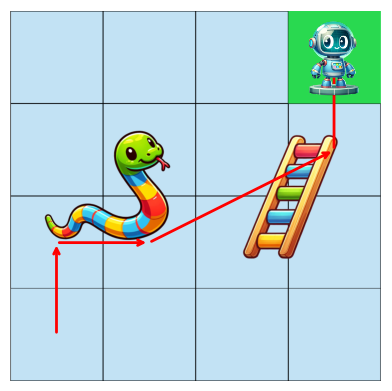

In [17]:
def render_game_board_with_path(board_position, path):
    # Load and display the game board
    board_img = mpimg.imread('Snakes_and_ladder.png')
    # Path to the robot icon image
    robot_icon_path = 'robot.png'

    fig, ax = plt.subplots()
    ax.imshow(board_img)

    # Grid size and cell size calculation
    grid_size = (4, 4)  # 4x4 grid
    cell_size_x = board_img.shape[1] / grid_size[1]
    cell_size_y = board_img.shape[0] / grid_size[0]

    # Plot the path
    for i in range(len(path) - 1):
        start = path[i]
        end = path[i + 1]
        start_x = start[0] * cell_size_x + cell_size_x / 2
        start_y = (grid_size[1] - start[1] - 1) * cell_size_y + cell_size_y / 2
        end_x = end[0] * cell_size_x + cell_size_x / 2
        end_y = (grid_size[1] - end[1] - 1) * cell_size_y + cell_size_y / 2
        ax.annotate("", xy=(end_x, end_y), xytext=(start_x, start_y),
                    arrowprops=dict(arrowstyle="->", lw=2, color="red"))

    # Load and overlay the robot icon at the last position
    robot_icon = mpimg.imread(robot_icon_path)
    zoom_factor = 0.4  # Adjust zoom factor to fit the icon in the cell
    robot_imagebox = OffsetImage(robot_icon, zoom=zoom_factor)
    robot_x = board_position[0] * cell_size_x + cell_size_x / 2
    robot_y = (grid_size[1] - board_position[1] - 1) * cell_size_y + cell_size_y / 2
    robot_ab = AnnotationBbox(robot_imagebox, (robot_x, robot_y), frameon=False)
    ax.add_artist(robot_ab)

    plt.axis('off')  # Turn off axis
    plt.show()


# Render the board with the robot at the last position of the path
render_game_board_with_path(path[-1], path)